## Part 1: Classification



In [3]:
# Two class classification problem in two dimensions. Synthetic data from make_blob

from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print'X ~ n_samples x n_features:', X.shape
print'y ~ n_samples:', y.shape

print'\nFirst 5 samples:\n', X[:5, :]
print'\nFirst 5 labels:', y[:5]

X ~ n_samples x n_features: (100L, 2L)
y ~ n_samples: (100L,)

First 5 samples:
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]


In [10]:
%matplotlib inline

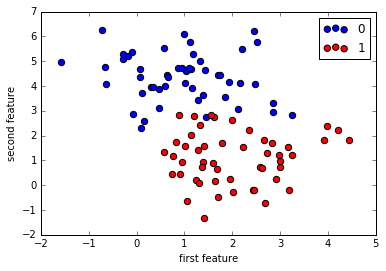

In [13]:
# The data is two dimensional so we can plot each sample in a two-dim coord. system
import matplotlib.pyplot as plt

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1')
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right')
plt.show()


In [14]:
# create training/testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.25,
                                                   random_state=1234,
                                                   stratify=y)

In [15]:
# Import Logistic Regression estimator

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [16]:
X_train.shape

(75L, 2L)

In [17]:
y_train.shape

(75L,)

In [18]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
prediction = classifier.predict(X_test)

In [20]:
print prediction
print y_test

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


In [23]:
import numpy as np

print 'Accuracy:', np.mean(prediction == y_test)

Accuracy: 0.84


In [25]:
# There is also classifier.score() for accuracy 

classifier.score(X_test,y_test)

0.83999999999999997

In [26]:
classifier.score(X_train, y_train)

0.94666666666666666

In [35]:
execfile('plot_2d_separator.py')

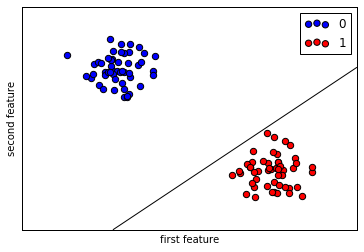

In [36]:
plt.scatter(X[y == 0,0], X[y == 0,1],
           c='blue', s=40, label='0')
plt.scatter(X[y == 1,0], X[y == 1,1],
           c='red', s=40, label='1')
plt.xlabel('first feature')
plt.ylabel('second feature')
plot_2d_separator(classifier, X)
plt.legend(loc='upper right')

In [37]:
# K Nearest Neighbors classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

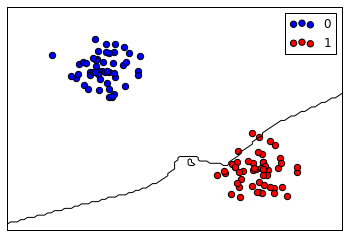

In [39]:
plt.scatter(X[y == 0,0], X[y == 0,1],
           c='blue', s=40, label='0')
plt.scatter(X[y == 1,0], X[y == 1,1],
           c='red', s=40, label='1')
plot_2d_separator(knn, X)
plt.legend(loc='upper right')

In [57]:
# Try KNN with Iris Data set. Example shown below:

In [58]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

X_trainsub, X_valid, y_trainsub, y_valid = train_test_split(X_train, y_train,
                                                            test_size=0.5,
                                                            random_state=1234,
                                                            stratify=y_train)

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = knn.fit(X_trainsub, y_trainsub).\
        score(X_trainsub, y_trainsub)
    valid_score = knn.score(X_valid, y_valid)
    print('k: %d, Train/Valid Acc: %.3f/%.3f' %
          (k, train_score, valid_score))


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k: 1, Train/Valid Acc: 1.000/0.946
k: 2, Train/Valid Acc: 1.000/0.964
k: 3, Train/Valid Acc: 1.000/0.946
k: 4, Train/Valid Acc: 1.000/0.964
k: 5, Train/Valid Acc: 1.000/0.929
k: 6, Train/Valid Acc: 1.000/0.929
k: 7, Train/Valid Acc: 1.000/0.929
k: 8, Train/Valid Acc: 1.000/0.929
k: 9, Train/Valid Acc: 1.000/0.929
k: 10, Train/Valid Acc: 1.000/0.946
k: 11, Train/Valid Acc: 1.000/0.946
k: 12, Train/Valid Acc: 1.000/0.964
k: 13, Train/Valid Acc: 1.000/0.929
k: 14, Train/Valid Acc: 1.000/0.946
k: 15, Train/Valid Acc: 1.000/0.929
k: 16, Train/Valid Acc: 1.000/0.929
k: 17, Train/Valid Acc: 1.000/0.929
k: 18, Train/Valid Acc: 0.964/0.946
k: 19, Train/Valid Acc: 0.964/0.929
k=9 Test Acc: 0.974


## Part 2: Regression Analysis

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [60]:
x = np.linspace(-3,3,100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [61]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

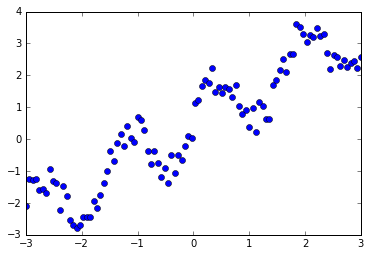

In [62]:
plt.plot(x,y, 'o')

In [64]:
# Linear Regression
#   - scikit-learn API requires target var (y) as 1-dim array, samples (x) expected to form
#     a 2-dimensional array
# -> Convert 1-dim x numpy array to an x array with 2-dim

print 'Before:', x.shape
X = x[:, np.newaxis]
print 'After:', X.shape

Before: (100L,)
After: (100L, 1L)


In [65]:
# split data set into 75% training 25% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
# Use Linear Regression to fit regression line to data

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# paramaterize linear regression model with following coefficients

print 'Weight coefficients:', regressor.coef_
print 'y-axis intercept:', regressor.intercept_

Weight coefficients: [ 0.90211711]
y-axis intercept: 0.448409749883


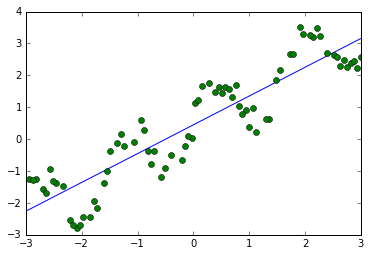

In [68]:
# Since the regression model is linear, the x/y relationship is defined as:
#          y = weight * x+intercept

min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o')

In [69]:
# using prediction the expectation is that the point will fall on the Linear Regression line

y_pred_train = regressor.predict(X_train)

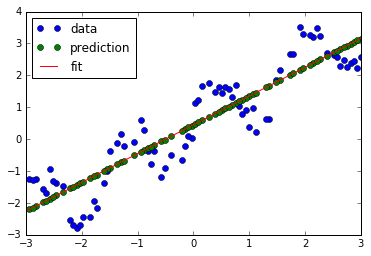

In [70]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

In [74]:
# The plot above captures the slope of the data but no details
# try the fit with the Test data to check the accuracy of the regression

y_pred_test = regressor.predict(X_test)

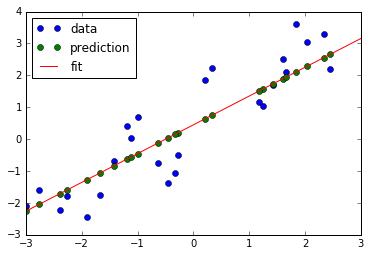

In [75]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

In [76]:
# to calculate the R^2 score:

regressor.score(X_test, y_test)

0.79943214050796851

In [78]:
# KNeighbors Regression

from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors = 1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

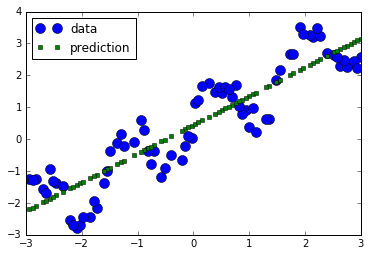

In [79]:
# first check results on the training set

y_pred_test = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label='data', markersize=10)
plt.plot(X_train, y_pred_train, 's', label='prediction', markersize=4)
plt.legend(loc='best')

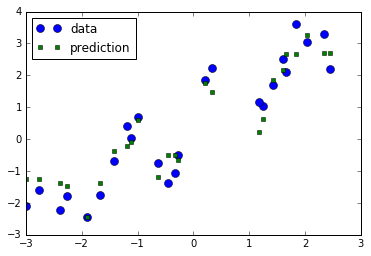

In [80]:
# check results on the test data and calculate R2 score

y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label='data', markersize=8)
plt.plot(X_test, y_pred_test, 's', label='prediction', markersize=4)
plt.legend(loc='best')

In [83]:
print 'Test Data R2:', kneighbor_regression.score(X_test, y_test)

Test Data R2: 0.916629302247


In [84]:
# The KNeighbors Regression fits the test data much better than the Training data. 
# The straight Regression line does not accurately represent the complexities in the data

In [85]:
# Exercise: Try Linear Regression and KNeighbors Regression on Boston Housing Data

In [95]:
print boston['DESCR']

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [108]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


boston = load_boston()
X = boston.data
y = boston.target

print ('X.shape:', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors=1)

linreg.fit(X_train,y_train)
print 'Linear Regression Train/Test: %.3f/%.3f' % (linreg.score(X_train, y_train), 
                                                  linreg.score(X_test, y_test))
knnreg.fit(X_train, y_train)
print 'KNeighborsRegressor Train/Test: %.3f/%.3f' % (knnreg.score(X_train, y_train),
                                                    knnreg.score(X_test, y_test))

('X.shape:', (506L, 13L))
Linear Regression Train/Test: 0.748/0.684
KNeighborsRegressor Train/Test: 1.000/0.474
